# Assignment 5
## Data Analysis and Visualization

These assignments are related to visualization with **MathPlotLib** and **Seaborn** libraries.
* [Matplotlib](https://matplotlib.org/)
* [seaborn](https://seaborn.pydata.org/)

In these assignments, you must program some new code to get as an output figure given in assignment.
* Read the related course material before doing the assignments from the
[Topic 5. Visualization](https://ttc8040.pages.labranet.jamk.fi/da_vi_material/lectures/topic5_visualize.nbconvert/).



## Assignment 05-01. Visualizing Weather Data

Visualize weather data loaded from the [Finnish Meteorological Institute's WFS interface](https://en.ilmatieteenlaitos.fi/download-observations) using a `DataFrame`. Before plotting the data, you need to process it as follows:
* Load the data into a `DataFrame` from the file `'data/saatiedot.csv'`, considering that ',' is the column separator and '.' is the decimal separator.
* The first column (or index) of the data contains the time in the format **year-month-day hours:minutes:seconds**.
* Create a new `DataFrame` column `'time, s'` indicating the amount of time in seconds from the first measurement onwards.
* Add a new column `'Air temperature, degC'` to the `DataFrame`.
* Print the first five rows of your processed `DataFrame`.

After processing the data, create an x-y plot as follows:
* Use the column `'time, s'` on the horizontal axis and the column `'Air temperature, degC'` on the vertical axis.
* Mark data points with red dots.
* Provide a legend for the red dots, labeled as `'Air temperature'`.
* Use `'time, s'` for the x-axis title and `'Air temperature $^{o}C$'` for the y-axis title.
* Use [TeX syntax](https://en.wikipedia.org/wiki/TeX) to denote the physical unit in the y-axis title.
* Add a grid with a _black dashed line_.

**The final result should look like the following image:**

![h5.1](./img/h5_t1.png)

                              Unnamed: 0  Air temperature, degC  \
time                                                              
2020-11-04 13:20:00  2020-11-04 13:20:00                    6.5   
2020-11-04 13:30:00  2020-11-04 13:30:00                    6.2   
2020-11-04 13:40:00  2020-11-04 13:40:00                    5.7   
2020-11-04 13:50:00  2020-11-04 13:50:00                    5.7   
2020-11-04 14:00:00  2020-11-04 14:00:00                    5.7   

                     Wind speed, m/s  Gust speed, m/s  Wind direction, deg  \
time                                                                         
2020-11-04 13:20:00              2.3              4.3                187.0   
2020-11-04 13:30:00              2.5              3.9                180.0   
2020-11-04 13:40:00              2.3              3.5                173.0   
2020-11-04 13:50:00              2.8              4.0                164.0   
2020-11-04 14:00:00              3.1              4.2         

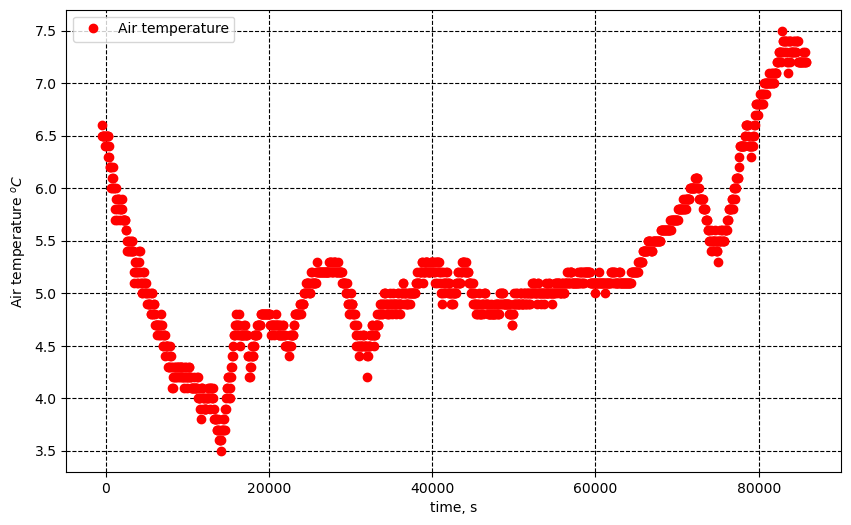

In [1]:
# TODO: Implementation
import pandas as pd
import matplotlib.pyplot as plt

#loadin the data into a DataFrame
file_path = 'data/saatiedot.csv'
df = pd.read_csv(file_path, sep=',', decimal='.')

#converting the first column to datetime and set it as index
df['time'] = pd.to_datetime(df.iloc[:, 0])
df.set_index('time', inplace=True)

#creating a new DataFrame column 'time, s' indicating the amount of time in seconds from the first measurement onwards
df['time, s'] = (df.index - df.index[0]).total_seconds()

#renaming the column 'Ilman lämpötila (degC)' to 'Air temperature, degC'
df.rename(columns={'Ilman lämpötila (degC)': 'Air temperature, degC'}, inplace=True)

#printing the first five rows of the processed DataFrame
print(df.head())

#plotting the data
plt.figure(figsize=(10, 6))
plt.plot(df['time, s'], df['Air temperature, degC'], 'ro', label='Air temperature')

#adding titles and labels
plt.xlabel('time, s')
plt.ylabel('Air temperature $^{o}C$')
plt.legend()
plt.grid(True, linestyle='--', color='k')

plt.show()


## Assignment 05-02. Premier League Standings

Visualize selected Premier League football teams' home and away wins in the same bar chart. Before plotting the data, you need to process it as follows:
* Load the data into a `DataFrame` from the given url address (`"data/england-premier-league-teams-2018-to-2019-stats.csv"`).
* Add new columns `common_name`, `wins_home` (home wins), and `wins_away` (away wins) to the DataFrame.
* Select the following teams from the DataFrame (`common_name` column): `'Arsenal', 'Tottenham Hotspur', 'Manchester City', 'Manchester United', 'Chelsea', 'Liverpool', 'Everton'`
* Shorten the team names for the chart by creating a new column `short_name` with the following names: `'Arsenal', 'Tottenham', 'ManCity', 'ManU', 'Chelsea', 'Liverpool', 'Everton'`
* Create a new DataFrame using the `df.melt(id_vars, var_name, value_name ...)` method with new columns `Win Type` and `Wins`
```
   short_name   Win Type  Wins
0     Arsenal  wins_home    14
::::::::::::::::::::::::::::::
7     Arsenal  wins_away     7
```

* After processing the data, create a bar chart on an (x, y)-plane, where the x-axis shows the team's shortened name and the y-axis shows both home wins (`wins_home`) and away wins (`wins_away`).
* Provide a legend for the bars (hint: `Legend`).
* Rotate the x-axis titles by 30 degrees (hint: `xticks`).
* Set a title for the chart.

**The final result should look like the following image:**

![h5.2](./img/h5_t2.png)

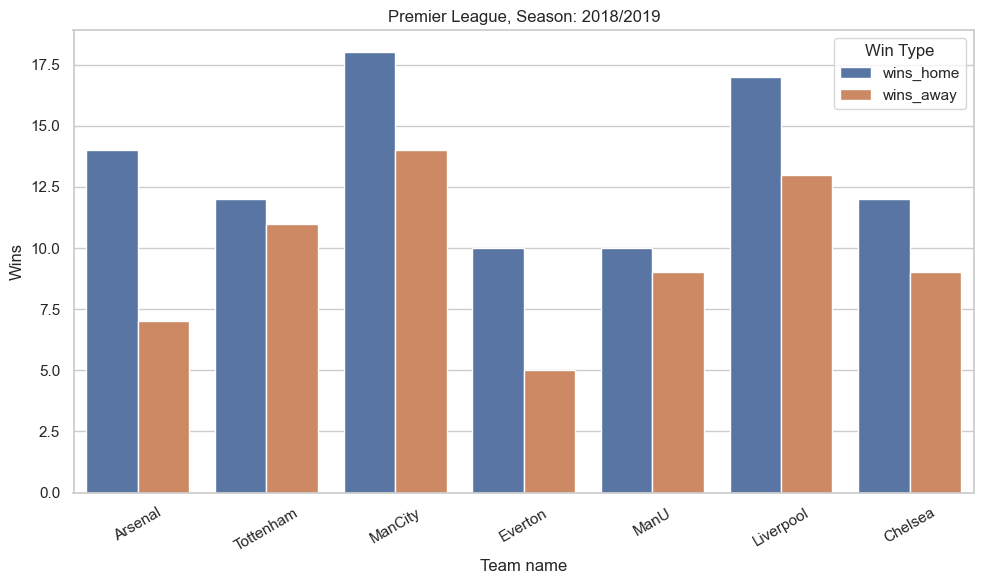

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#loading the data into a DataFrame
file_path = 'data/england-premier-league-teams-2018-to-2019-stats.csv'
df = pd.read_csv(file_path)

#adding new columns: common_name, wins_home, and wins_away
df['common_name'] = df['team_name']
df['wins_home'] = df['wins_home']
df['wins_away'] = df['wins_away']

#selecting the specified teams
selected_teams = [
    'Arsenal FC', 'Tottenham Hotspur FC', 'Manchester City FC',
    'Manchester United FC', 'Chelsea FC', 'Liverpool FC', 'Everton FC'
]
df_selected = df[df['common_name'].isin(selected_teams)].copy()

#creating a new column with shortened team names
short_names = {
    'Arsenal FC': 'Arsenal',
    'Tottenham Hotspur FC': 'Tottenham',
    'Manchester City FC': 'ManCity',
    'Manchester United FC': 'ManU',
    'Chelsea FC': 'Chelsea',
    'Liverpool FC': 'Liverpool',
    'Everton FC': 'Everton'
}
df_selected.loc[:, 'short_name'] = df_selected['common_name'].map(short_names)

#melting the DataFrame
df_melted = df_selected.melt(id_vars=['short_name'], value_vars=['wins_home', 'wins_away'], 
                             var_name='Win Type', value_name='Wins')

#bar chart created
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

ax = sns.barplot(x='short_name', y='Wins', hue='Win Type', data=df_melted)
ax.set_title('Premier League, Season: 2018/2019')
ax.set_xlabel('Team name')
ax.set_ylabel('Wins')
plt.xticks(rotation=30)

plt.legend(title='Win Type')
plt.tight_layout()
plt.show()


## Assignment 05-03. Premier League Standings

Visualize Premier League football data for selected teams, showing both home and away wins in the same bar chart. Before plotting the data, process it as follows:
* Load the data into a `DataFrame` from the file `"data/england-premier-league-teams-2018-to-2019-stats.csv"`.
* Add columns `team_name, common_name, season, wins, draws`, and `losses` to the `DataFrame`.
* Select the following teams (`common_name`): `'Arsenal', 'Tottenham Hotspur', 'Manchester City', 'Manchester United', 'Chelsea', 'Liverpool', 'Everton'`
* Shorten the team names for the chart by creating a new column `short_name` with the following names: `'Arsenal', 'Tottenham', 'ManCity', 'ManU', 'Chelsea', 'Liverpool', 'Everton'`
* Add a completely new column `points` to the `DataFrame` using the formula: `wins * 3 + draws` (0 points for losses).

After processing the data, create a bar chart on a transposed (x, y)-plane, where the y-axis shows the shortened team name, and the x-axis shows the points collected by the team.
* Try to rotate the y-axis titles by _30_ degrees (hint: `plt.yticks`).
* Add dynamically a title for the y-axis, including information about the season (`season`) and the number of matches played (`matches_played`) from the original `DataFrame`.
* Add a grid to the chart (hint: `grid`).

**The final result should look like the following image:**

![h5.3](./img/h5_t3.png)

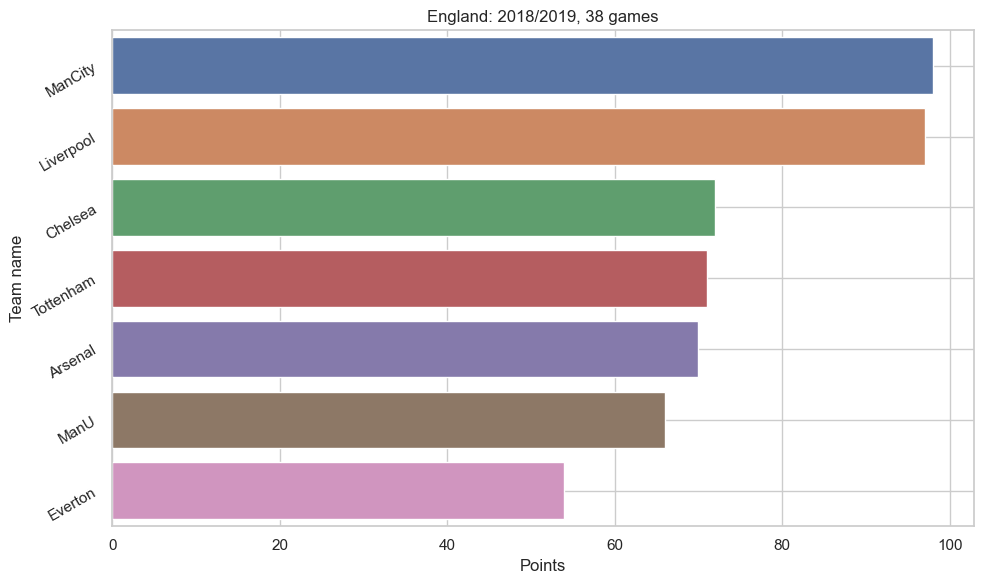

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#loading the data into a DataFrame
file_path = 'data/england-premier-league-teams-2018-to-2019-stats.csv'
df = pd.read_csv(file_path)

#adding necessary columns: team_name, common_name, season, wins, draws, and losses
df['team_name'] = df['team_name']
df['common_name'] = df['team_name']
df['season'] = df['season']
df['wins'] = df['wins']
df['draws'] = df['draws']
df['losses'] = df['losses']

#selecting the specified teams
selected_teams = [
    'Arsenal FC', 'Tottenham Hotspur FC', 'Manchester City FC',
    'Manchester United FC', 'Chelsea FC', 'Liverpool FC', 'Everton FC'
]
df_selected = df[df['common_name'].isin(selected_teams)].copy()

#creating a new column with shortened team names
short_names = {
    'Arsenal FC': 'Arsenal',
    'Tottenham Hotspur FC': 'Tottenham',
    'Manchester City FC': 'ManCity',
    'Manchester United FC': 'ManU',
    'Chelsea FC': 'Chelsea',
    'Liverpool FC': 'Liverpool',
    'Everton FC': 'Everton'
}
df_selected.loc[:, 'short_name'] = df_selected['common_name'].map(short_names)

#adding a new column points using the formula: wins * 3 + draws
df_selected['points'] = df_selected['wins'] * 3 + df_selected['draws']

#sorting the DataFrame by points in descending order
df_selected = df_selected.sort_values(by='points', ascending=False)

#creating the bar chart with the sorted data
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

ax = sns.barplot(x='points', y='short_name', data=df_selected, order=df_selected['short_name'])
ax.set_title('England: 2018/2019, 38 games')
ax.set_xlabel('Points')
ax.set_ylabel('Team name')

#rotating the y-axis titles by 30 degrees
plt.yticks(rotation=30)

#adding grid to the chart
plt.grid(True)

plt.tight_layout()
plt.show()


## Assignment 05-04. Visualizing Car Data

Load the data into a `DataFrame` from the file: `data/autot.csv`.
Save only those rows in a new `DataFrame` where the car manufacturer (column `Mh`) has more than 50 cars. In the new `DataFrame`, replace the string `'DIESEL'` in column `Ft` with `'Diesel'` and `'PETROL'` with `'Petrol'`. If the string `'NG'` appears in column `Ft`, replace it with `'Natural gas'`.

The result of the visualization is an image similar to the one below, where you utilize the columns of your `DataFrame` for the car fuel type `Ft` and the car manufacturer `Mh`.

**The final result should look like the following image:**

![h5.4](./img/h5_t4.png)

Index(['ID', 'MS', 'Mp', 'VFN', 'Mh', 'Man', 'MMS', 'TAN', 'T', 'Va', 'Ve',
       'Mk', 'Cn', 'Ct', 'Cr', 'm (kg)', 'ID.1', 'Mt', 'Enedc (g/km)',
       'Ewltp (g/km)', 'W (mm)', 'At1 (mm)', 'At2 (mm)', 'Ft', 'Fm',
       'ec (cm3)', 'ep (KW)', 'z (Wh/km)', 'It', 'Ernedc (g/km)',
       'Erwltp (g/km)', 'De', 'Vf', 'r'],
      dtype='object')


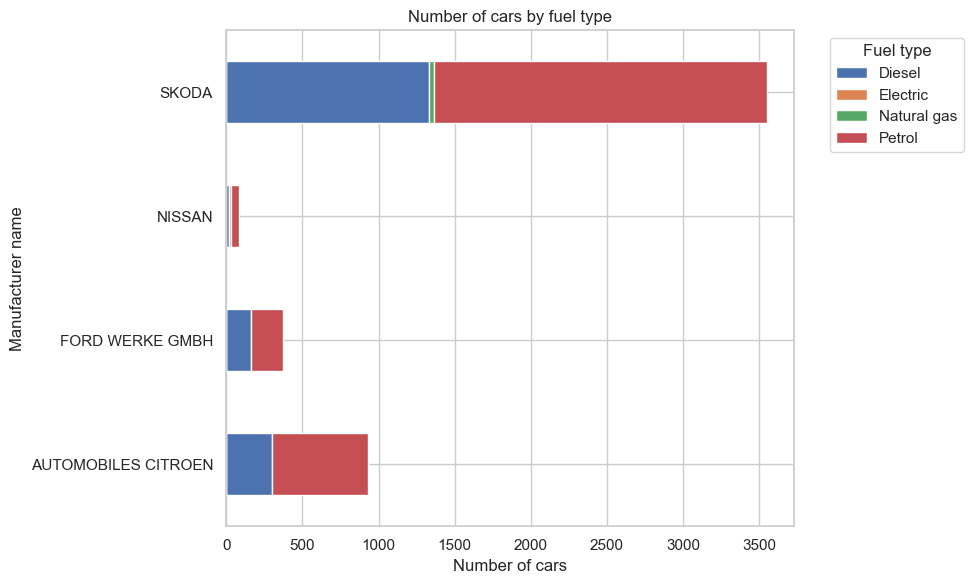

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

#loading the data from the file with tab as the delimiter
file_path = 'data/autot.csv'
df = pd.read_csv(file_path, delimiter='\t', on_bad_lines='skip')

#display the columns of the dataframe to confirm correct reading
print(df.columns)

#setting the correct column names for manufacturer and fuel type
manufacturer_col = 'Mh'  # Manufacturer
fueltype_col = 'Ft'  # Fuel Type

#filtering the Dataframe to keep only rows where the car manufacturer has more than 50 cars
manufacturer_counts = df[manufacturer_col].value_counts()
filtered_data = df[df[manufacturer_col].isin(manufacturer_counts[manufacturer_counts > 50].index)]

#Replacing specified string values in the 'Ft' column using .loc to avoid SettingWithCopyWarning
filtered_data.loc[:, fueltype_col] = filtered_data[fueltype_col].replace({
    'DIESEL': 'Diesel',
    'PETROL': 'Petrol',
    'NG': 'Natural gas'
})

#grouping the data by manufacturer and fuel type, and count the occurrences
fuel_type_counts = filtered_data.groupby([manufacturer_col, fueltype_col]).size().unstack(fill_value=0)

# Plotting the data
fuel_type_counts.plot(kind='barh', stacked=True, figsize=(10, 6))

plt.title('Number of cars by fuel type')
plt.xlabel('Number of cars')
plt.ylabel('Manufacturer name')
plt.legend(title='Fuel type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Display the plot
plt.show()


## Assignment 05-05. Visualizing Car Data Part 2

Load the same data as in previous assignment into a `DataFrame` from the file: `data/autot.csv`

The result of the visualization is a _histogram_ similar to the one below, showing the distribution of $CO_2$ emissions (column `Enedc (g/km)`) in 100 different bins and a *cumulative histogram* of $CO_2$ emissions

**The final result should look like the following image:**

![h5.5](./img/h5_t5.png)


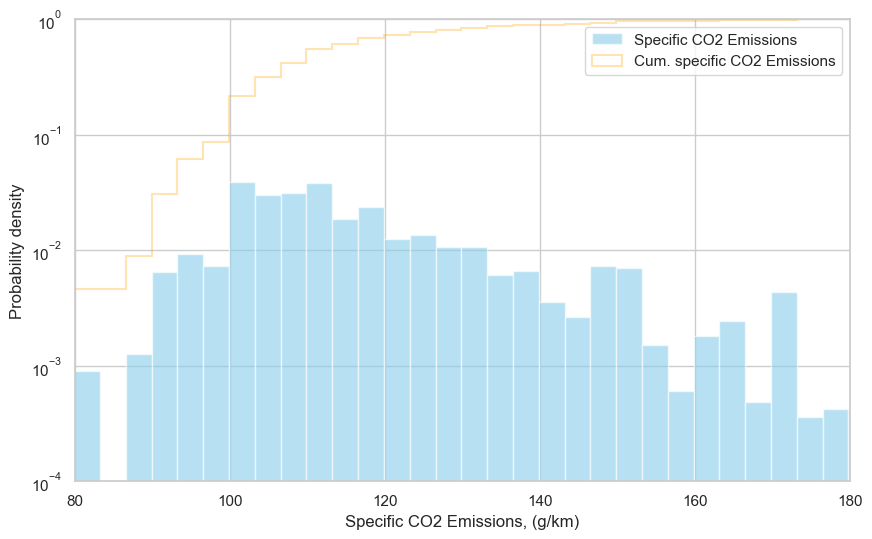

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Loading the data from the CSV file
file_path = 'data/autot.csv'

# Reading the file with tab as the delimiter, skipping problematic rows
problematic_rows = [
    2656, 2728, 4141, 4142, 4143, 4144, 4145, 4146, 4147, 4148, 4149, 4150,
    4151, 4152, 4153, 4154, 4155, 4156, 4157, 4158, 4159, 4160, 4161, 4162,
    4163, 4164, 4165, 4166, 4167, 4168, 4169, 4170, 4171, 4172, 4173, 4174,
    4175, 4176, 4177, 4178, 4179, 4180, 4664
]

data = pd.read_csv(file_path, delimiter='\t', skiprows=problematic_rows)

#CO2 emissions data extracted
co2_emissions = data['Enedc (g/km)']

# histogram and cumulative histogram are created
plt.figure(figsize=(10, 6))

# Plotting the histogram
count, bins, ignored = plt.hist(co2_emissions, bins=100, density=True, alpha=0.6, color='skyblue', label='Specific CO2 Emissions')

#cumulative histogram plotted
plt.hist(co2_emissions, bins=100, density=True, cumulative=True, alpha=0.3, color='orange', edgecolor='orange', histtype='step', linewidth=1.5, label='Cum. specific CO2 Emissions')

#setting the scale to log for the y-axis
plt.yscale('log')
plt.xlim(80, 180)
plt.ylim(1e-4, 1)

#setting labels and title
plt.xlabel('Specific CO2 Emissions, (g/km)')
plt.ylabel('Probability density')
plt.legend(loc='upper right')

# Show the plot
plt.show()
